<font size=6>Decision Tree Classifier</font><br>
<font size=5>Autor: <font color="#F15CAB"> Juliana Galeano <br></font>
<font size=3>GitHub: <font color="#A371F7"> @JulianaG1524 <br></font>
<font size=3>Cuenta uniandes: <font color="#2890f9"> ja.galeanoc1</font>

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [2]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

In [3]:
data = pd.read_csv('data/datos_convertidos.csv')

In [4]:
data.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,0,0,0,0,0,0,1,60,0,0,1,3,8.0,0,0,0,0
1,1,28.75,0,0,0,0,2,0,1,55,0,0,1,3,7.0,0,0,0,0
2,2,19.90,1,0,0,0,1,0,1,65,0,0,1,2,7.0,0,0,0,0
3,3,28.06,0,0,0,1,1,0,0,65,0,1,1,2,8.0,0,0,0,0
4,4,29.29,1,0,0,0,1,0,0,70,0,0,1,3,7.0,1,0,0,0


In [5]:
data.describe()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.00000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000
mean,33783.843779,28.300153,0.437163,0.067540,0.076042,3.430666,3.941559,0.139558,0.535346,64.663510,0.71665,0.225038,0.776530,2.609901,6.951033,0.132624,0.037092,0.094337,0.086094
std,19500.423273,6.211283,0.496040,0.250958,0.265067,8.100786,8.117292,0.346530,0.574922,7.464508,1.45877,0.510276,0.416574,1.025881,1.730172,0.339171,0.188988,0.292299,0.280506
min,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16885.250000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33829.500000,27.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.00000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,50690.750000,31.190000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,65.000000,1.00000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,67499.000000,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,2.000000,80.000000,5.00000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.dtypes

Index                 int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [7]:
data.isnull().mean()

Index               0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
HeartDisease        0.0
dtype: float64

<AxesSubplot:title={'center':'# personas que han reportado CHD o MI'}, xlabel='HeartDisease', ylabel='count'>

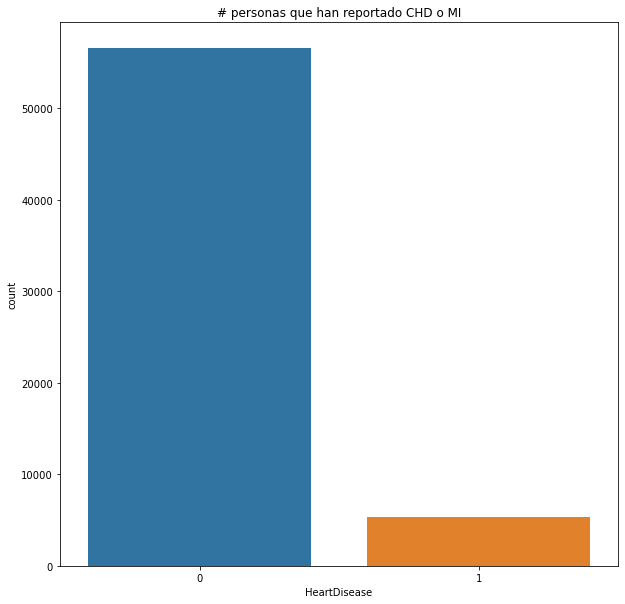

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.title('# personas que han reportado CHD o MI')
sns.countplot(x='HeartDisease', data=data)

In [9]:
features = list(data.columns)
features.remove('Index')
features.remove('HeartDisease')
print(features)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['HeartDisease'], test_size=0.2, random_state=15)

<AxesSubplot:title={'center':'Distribución de los datos de prueba'}, xlabel='HeartDisease', ylabel='count'>

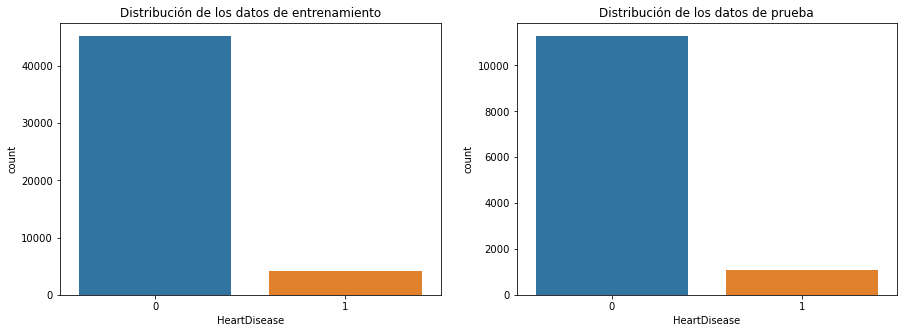

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Distribución de los datos de entrenamiento')
sns.countplot(x=y_train, ax=ax[0])
ax[1].set_title('Distribución de los datos de prueba')
sns.countplot(x=y_test, ax=ax[1])

In [12]:
tree_model = DecisionTreeClassifier(max_depth =15, random_state = 1)

In [13]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=1)

In [14]:
tree_model.get_depth()

15

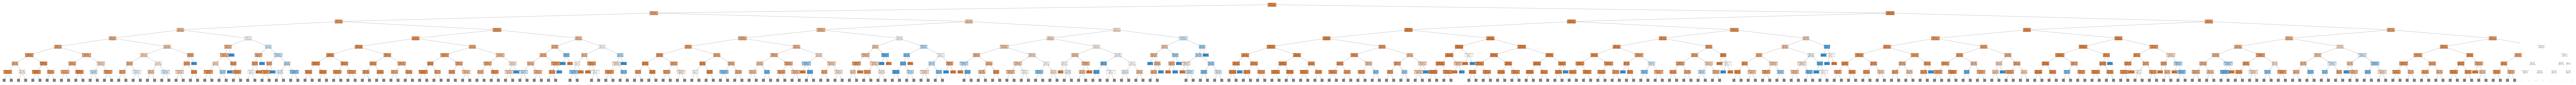

In [15]:
fig = plt.figure(figsize = (600, 20))
_ = tree.plot_tree(tree_model, max_depth = 8, feature_names = features, filled = True, fontsize = 9)
fig.savefig('Tree/decistion_tree.png') # También es posible guardar esta figura como una imagen

In [16]:
preds_train = tree_model.predict(x_train)
preds_test = tree_model.predict(x_test)

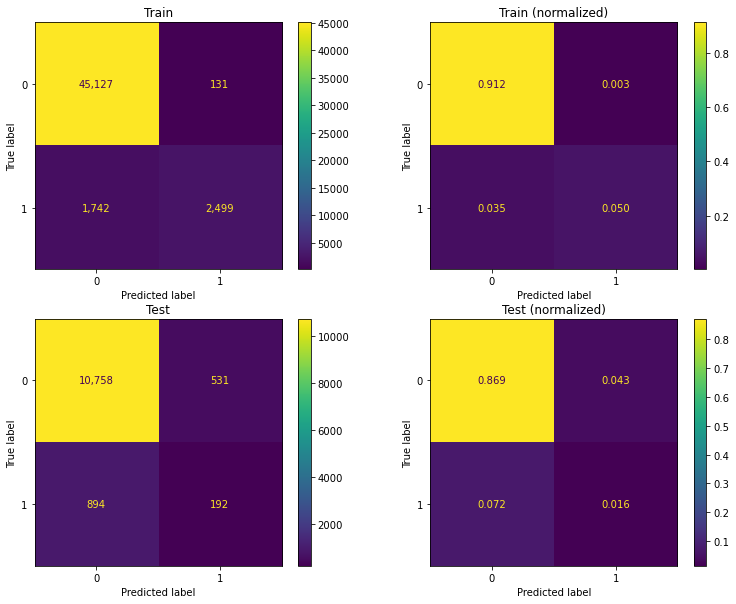

In [17]:
cm_train = confusion_matrix(y_train, preds_train, labels = tree_model.classes_)
cm_train_norm = confusion_matrix(y_train, preds_train, labels = tree_model.classes_, normalize = 'all')
cm_test = confusion_matrix(y_test, preds_test, labels = tree_model.classes_)
cm_test_norm = confusion_matrix(y_test, preds_test, labels = tree_model.classes_, normalize = 'all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = tree_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = tree_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = tree_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = tree_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [18]:
pd.DataFrame([
    {
        'Train': accuracy_score(y_train, preds_train),
        'Test': accuracy_score(y_test, preds_test)
    },
    {
        'Train': precision_score(y_train, preds_train),
        'Test': precision_score(y_test, preds_test)
    },
    {
        'Train': recall_score(y_train, preds_train),
        'Test': recall_score(y_test, preds_test)
    },
    {
        'Train': f1_score(y_train, preds_train),
        'Test': f1_score(y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.962161,0.884848
Precision,0.950190,0.265560
Recall,0.589248,0.176796
F1,0.727405,0.212272


<AxesSubplot:ylabel='Feature'>

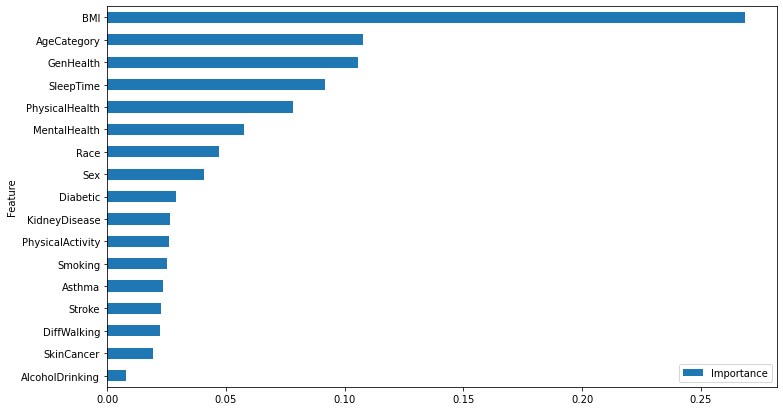

In [19]:
feature_importance_df = pd.DataFrame([features, tree_model.feature_importances_]).T
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df.sort_values(by = 'Importance').plot.barh(x = 'Feature', y = 'Importance', figsize = (12, 7))

In [25]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 50, 80, 100],
    'min_samples_split': [2, 3, 4, 5, 8, 10 ,15, 20, 40, 80, 100],
    'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10 ,15, 20, 40, 80, 100],
    'max_features': ["auto", "sqrt", "log2"],
    'max_leaf_nodes': [1, 2, 3, 4, 5, 8, 10 ,15, 20, 40, 80, 100],
}

In [26]:
grid_tree_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=15), param_grid, scoring = ['precision', 'recall', 'f1'],  refit = 'f1', cv = 5, n_jobs = -1, verbose = 2, n_iter=15400)

In [27]:
grid_tree_model.fit(x_train, y_train)

Fitting 5 folds for each of 15400 candidates, totalling 77000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 3666 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5204 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6906 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8768 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 10794 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 15330 tasks      

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=15),
                   n_iter=15400, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 4, 8, 12, 16, 20,
                                                      24, 28, 32, 36, 40, 50,
                                                      80, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 8, 10,
                                                           15, 20, 40, 80,
                                                           100],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 8,
                                                             10, 15, 20, 40, 80,
                                                             100],

In [28]:
# Se puede generar una tabla con todos los detalles de la ejecución
cv_results_df = pd.DataFrame(grid_tree_model.cv_results_)

In [29]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,param_criterion,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.050603,0.004717,0.033203,0.007961,40,15,3,auto,20,entropy,"{'min_samples_split': 40, 'min_samples_leaf': ...",0.0,0.00,0.0,0.000000,0.0,0.00000,0.00000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972
1,0.083806,0.020381,0.035004,0.003744,40,1,20,auto,20,gini,"{'min_samples_split': 40, 'min_samples_leaf': ...",0.0,0.45,0.5,0.484848,0.0,0.28697,0.23487,3124,0.0,0.010613,0.016509,0.018846,0.0,0.009194,0.007972,3316,0.0,0.020737,0.031963,0.036281,0.0,0.017796,0.015391,3314
2,0.076007,0.010101,0.026801,0.003817,100,8,20,log2,12,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.0,0.45,0.5,0.484848,0.0,0.28697,0.23487,3124,0.0,0.010613,0.016509,0.018846,0.0,0.009194,0.007972,3316,0.0,0.020737,0.031963,0.036281,0.0,0.017796,0.015391,3314
3,0.064005,0.010336,0.036604,0.014854,8,1,10,log2,36,gini,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.0,0.00,0.0,0.000000,0.0,0.00000,0.00000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972
4,0.057404,0.012306,0.027201,0.002398,40,100,4,auto,24,entropy,"{'min_samples_split': 40, 'min_samples_leaf': ...",0.0,0.00,0.0,0.000000,0.0,0.00000,0.00000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3972


In [30]:
# También se puede obtener directamente los parámetros del mejor modelo encontrado
grid_tree_model.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 100,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

In [31]:
# ... así como el score, en este caso F1, de dicho modelo
grid_tree_model.best_score_

0.10564956095613978

In [32]:
best_tree_model_results_df = cv_results_df[[ c for c in cv_results_df.columns if 'split' in c][1:]].iloc[grid_tree_model.best_index_].reset_index()
best_tree_model_results_df['split'], best_tree_model_results_df['set'], best_tree_model_results_df['metric'] = zip(*list(best_tree_model_results_df['index'].apply(lambda x: x.split('_'))))
best_tree_model_results_df.rename(columns = {grid_tree_model.best_index_: 'value'}, inplace = True)
best_tree_model_results_df.drop(columns = 'index', inplace = True)

In [33]:
best_tree_model_results_df.head()

,value,split,set,metric
0,0.346154,split0,test,precision
1,0.518868,split1,test,precision
2,0.401709,split2,test,precision
3,0.413793,split3,test,precision
4,0.505814,split4,test,precision


<AxesSubplot:xlabel='metric', ylabel='value'>

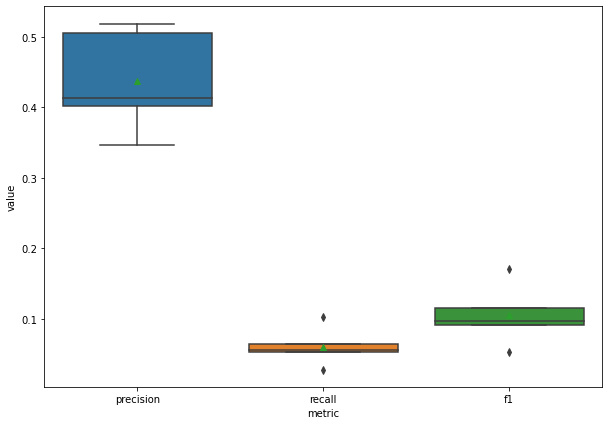

In [34]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'metric', y = 'value', showmeans = True, data = best_tree_model_results_df)

In [35]:
filename = 'Tree/' + str(datetime.now().strftime("%d-%H-%M-%S")) + '.pkl'

In [36]:
pkl.dump(grid_tree_model, open(filename, 'wb'))

In [40]:
lista_modelos =  [f for f in os.listdir('Tree') if f.endswith('.pkl')]
lista_modelos

['04-17-09-40.pkl', '04-17-17-39.pkl', '04-18-19-05.pkl', '04-18-44-46.pkl']

In [42]:
mejor_score = 0
mejor_fit = None
for m in lista_modelos:
    modelo = pkl.load(open('Tree/' + m, 'rb'))
    print(m, modelo.best_score_)
    print(modelo.best_params_)
    if modelo.best_score_ > mejor_score:
        mejor_score = modelo.best_score_
        mejor_fit = modelo

04-17-09-40.pkl 0.2421985350063236
{'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 5}
04-17-17-39.pkl 0.2421985350063236
{'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 5}
04-18-19-05.pkl 0.08470010109821882
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 80, 'max_features': 'log2', 'max_depth': 80, 'criterion': 'gini'}
04-18-44-46.pkl 0.10564956095613978
{'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'gini'}


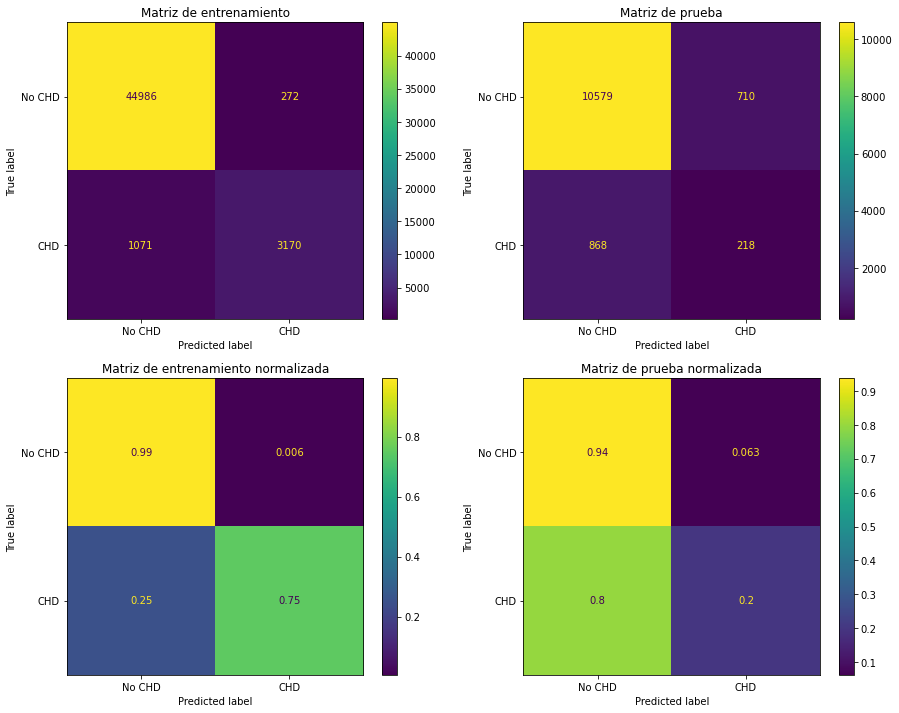

In [43]:
mejor_pred_train = mejor_fit.predict(x_train)
mejor_pred_test = mejor_fit.predict(x_test)

cm_train = confusion_matrix(y_train, mejor_pred_train)
cm_test = confusion_matrix(y_test, mejor_pred_test)
cm_train_norm = confusion_matrix(y_train, mejor_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, mejor_pred_test, normalize='true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
ax1.set_title('Matriz de entrenamiento')
ax2.set_title('Matriz de prueba')
ax3.set_title('Matriz de entrenamiento normalizada')
ax4.set_title('Matriz de prueba normalizada')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No CHD', 'CHD']).plot(ax=ax1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No CHD', 'CHD']).plot(ax=ax2)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax3)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax4)

plt.show()

In [44]:
pd.DataFrame([{'Train': accuracy_score(y_train, mejor_pred_train), 'Test': accuracy_score(y_test, mejor_pred_test)},
                {'Train': precision_score(y_train, mejor_pred_train), 'Test': precision_score(y_test, mejor_pred_test)},
                {'Train': recall_score(y_train, mejor_pred_train), 'Test': recall_score(y_test, mejor_pred_test)},
                {'Train': f1_score(y_train, mejor_pred_train), 'Test': f1_score(y_test, mejor_pred_test)}
                ], index=['Accuracy', 'Precision', 'Recall', 'F1'])


,Train,Test
Accuracy,0.972868,0.872485
Precision,0.920976,0.234914
Recall,0.747465,0.200737
F1,0.825198,0.216485


<AxesSubplot:ylabel='Feature'>

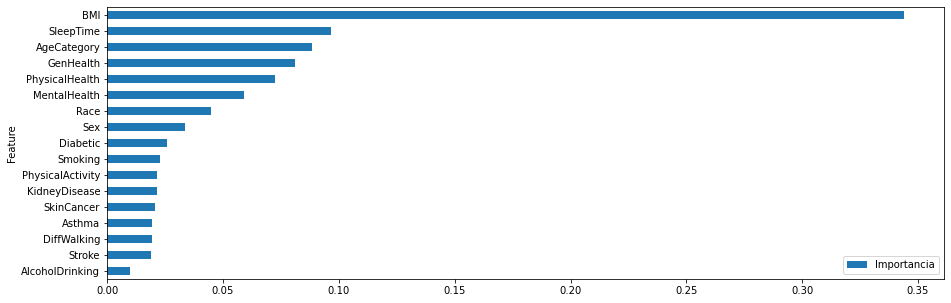

In [45]:
importancia = pd.DataFrame({'Feature': features, 'Importancia': mejor_fit.best_estimator_.feature_importances_})
importancia.columns = ['Feature', 'Importancia']
importancia = importancia.sort_values(by='Importancia', ascending=True)
importancia.plot.barh(x='Feature', y='Importancia', figsize=(15, 5))